In [1]:
from keras.datasets import imdb

Using TensorFlow backend.


In [7]:
(train_data,train_lables),(test_data,test_lables) = imdb.load_data(num_words = 10000)

In [9]:
train_data.shape

(25000,)

In [10]:
test_data.shape

(25000,)

In [8]:
max([max(sequence) for sequence in train_data])

9999

25000

In [25]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

In [26]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [ ]:
y_train = np.array(train_lables).astype('float32')
y_test = np.array(test_lables).astype('float32')

In [39]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [41]:
from keras import layers
from keras import models
from keras import optimizers
from keras import losses
from keras import metrics

model = models.Sequential()
model.add(layers.Dense(16, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(1, activation = 'sigmoid'))
model.compile(loss=losses.binary_crossentropy, optimizer=optimizers.RMSprop(lr=0.001), metrics=[metrics.binary_accuracy])

In [42]:
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val,y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 5s 307us/step - loss: 0.4904 - binary_accuracy: 0.7933 - val_loss: 0.3741 - val_binary_accuracy: 0.8709
Epoch 2/20
15000/15000 [==============================] - 3s 169us/step - loss: 0.3076 - binary_accuracy: 0.9037 - val_loss: 0.3206 - val_binary_accuracy: 0.8793
Epoch 3/20
15000/15000 [==============================] - 3s 178us/step - loss: 0.2386 - binary_accuracy: 0.9241 - val_loss: 0.2895 - val_binary_accuracy: 0.8880
Epoch 4/20
15000/15000 [==============================] - 3s 179us/step - loss: 0.1949 - binary_accuracy: 0.9411 - val_loss: 0.2875 - val_binary_accuracy: 0.8838
Epoch 5/20
15000/15000 [==============================] - 3s 167us/step - loss: 0.1652 - binary_accuracy: 0.9520 - val_loss: 0.2794 - val_binary_accuracy: 0.8865
Epoch 6/20
15000/15000 [==============================] - 3s 175us/step - loss: 0.1421 - binary_accuracy: 0.9593 - val_loss: 0.2859 - val_bi

In [43]:
history_dict = history.history

In [44]:
history_dict.keys()

dict_keys(['val_loss', 'val_binary_accuracy', 'loss', 'binary_accuracy'])

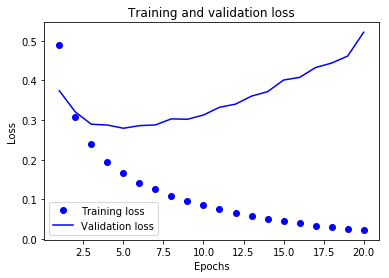

In [47]:
import matplotlib.pyplot as plt
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(history_dict['binary_accuracy']) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

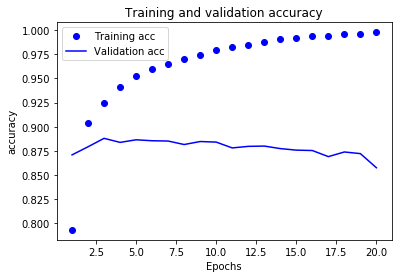

In [48]:
plt.clf()
acc_values = history_dict['binary_accuracy']
val_acc_values = history_dict['val_binary_accuracy']
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [50]:
from keras import layers
from keras import models
from keras import optimizers
from keras import losses
from keras import metrics

model = models.Sequential()
model.add(layers.Dense(16, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(1, activation = 'sigmoid'))
model.compile(loss=losses.binary_crossentropy, optimizer=optimizers.RMSprop(lr=0.001), metrics=[metrics.binary_accuracy])
history = model.fit(partial_x_train, partial_y_train, epochs=3, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/3
15000/15000 [==============================] - 2s 133us/step - loss: 0.4906 - binary_accuracy: 0.8033
Epoch 2/3
15000/15000 [==============================] - 2s 132us/step - loss: 0.3115 - binary_accuracy: 0.9057
Epoch 3/3
25000/25000 [==============================] - 3s 125us/step


In [51]:
model.predict(x_test)

array([[0.2876297 ],
       [0.99027866],
       [0.6495205 ],
       ...,
       [0.10332194],
       [0.17546967],
       [0.40150583]], dtype=float32)